In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from qiskit.providers.ibmq import least_busy
from fractions import Fraction

In [2]:
def qft_inv(n):
    qc = QuantumCircuit(n)
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT_INV"
    return qc

In [3]:
n_count = 4
n = 5
qc = QuantumCircuit(n_count+4, n_count)
for q in range(n_count):
    qc.h(q)

qc.cx(0,4)
qc.cx(1,5)
qc.cx(2,6)
qc.cx(3,7)
qc.append(qft_inv(n_count), range(n_count))
qc.measure(range(n_count), range(n_count))
qc.draw()


┌───┐                    ┌──────────┐┌─┐         
q_0: ┤ H ├──■─────────────────┤0         ├┤M├─────────
     ├───┤  │                 │          │└╥┘┌─┐      
q_1: ┤ H ├──┼────■────────────┤1         ├─╫─┤M├──────
     ├───┤  │    │            │  QFT_INV │ ║ └╥┘┌─┐   
q_2: ┤ H ├──┼────┼────■───────┤2         ├─╫──╫─┤M├───
     ├───┤  │    │    │       │          │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├──┼────┼────┼────■──┤3         ├─╫──╫──╫─┤M├
     └───┘┌─┴─┐  │    │    │  └──────────┘ ║  ║  ║ └╥┘
q_4: ─────┤ X ├──┼────┼────┼───────────────╫──╫──╫──╫─
          └───┘┌─┴─┐  │    │               ║  ║  ║  ║ 
q_5: ──────────┤ X ├──┼────┼───────────────╫──╫──╫──╫─
               └───┘┌─┴─┐  │               ║  ║  ║  ║ 
q_6: ───────────────┤ X ├──┼───────────────╫──╫──╫──╫─
                    └───┘┌─┴─┐             ║  ║  ║  ║ 
q_7: ────────────────────┤ X ├─────────────╫──╫──╫──╫─
                         └───┘             ║  ║  ║  ║ 
c: 4/══════════════════════════════════════╩══╩══╩══╩═
                                           0  1  2  3

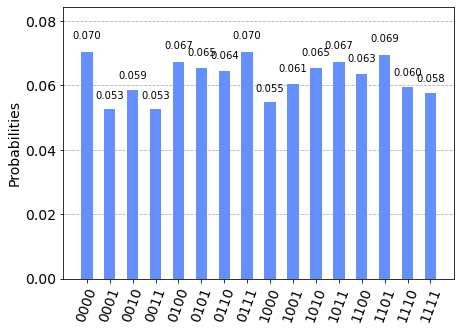

In [4]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [5]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

         Register Output         Phase
0   0110(bin) =   6(dec)   6/16 = 0.38
1   0000(bin) =   0(dec)   0/16 = 0.00
2   1000(bin) =   8(dec)   8/16 = 0.50
3   1100(bin) =  12(dec)  12/16 = 0.75
4   1011(bin) =  11(dec)  11/16 = 0.69
5   1101(bin) =  13(dec)  13/16 = 0.81
6   0001(bin) =   1(dec)   1/16 = 0.06
7   1001(bin) =   9(dec)   9/16 = 0.56
8   0010(bin) =   2(dec)   2/16 = 0.12
9   1110(bin) =  14(dec)  14/16 = 0.88
10  1010(bin) =  10(dec)  10/16 = 0.62
11  0101(bin) =   5(dec)   5/16 = 0.31
12  0111(bin) =   7(dec)   7/16 = 0.44
13  0011(bin) =   3(dec)   3/16 = 0.19
14  0100(bin) =   4(dec)   4/16 = 0.25
15  1111(bin) =  15(dec)  15/16 = 0.94


In [6]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

     Phase Fraction  Guess for r
0   0.3750      3/8            8
1   0.0000      0/1            1
2   0.5000      1/2            2
3   0.7500      3/4            4
4   0.6875     9/13           13
5   0.8125     9/11           11
6   0.0625     1/15           15
7   0.5625      5/9            9
8   0.1250      1/8            8
9   0.8750      7/8            8
10  0.6250      5/8            8
11  0.3125     4/13           13
12  0.4375      4/9            9
13  0.1875     2/11           11
14  0.2500      1/4            4
15  0.9375    14/15           15


In [7]:
from math import gcd # greatest common divisor
gcd(255,21)

3